<a href="https://colab.research.google.com/github/GauravGhatuary/Projects/blob/main/Population_estimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading files from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
world_pop=pd.read_csv('/gdrive/My Drive/Colab Notebooks/World population estimate/Population-EstimatesCSV.csv')

In [ ]:
world_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Africa Eastern and Southern,AFE,Age dependency ratio (% of working-age populat...,SP.POP.DPND,89.594604,89.873370,90.191721,90.574678,90.952719,91.346821,...,64.983505,64.262652,63.568478,62.903569,62.271839,61.671859,61.093078,60.532149,59.989773,59.466344
1,Africa Eastern and Southern,AFE,"Age dependency ratio, old",SP.POP.DPND.OL,5.626944,5.598776,5.571718,5.549702,5.534236,5.526348,...,6.787209,6.872591,6.970254,7.082884,7.210768,7.350748,7.498370,7.650862,7.810104,7.978993
2,Africa Eastern and Southern,AFE,"Age dependency ratio, young",SP.POP.DPND.YG,83.668705,83.936992,84.243994,84.613140,84.994512,85.398509,...,57.627460,56.845216,56.079433,55.330203,54.599882,53.889250,53.191463,52.505471,51.830786,51.165385
3,Africa Eastern and Southern,AFE,"Age population, age 00, female",SP.POP.AG00.FE.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,"Age population, age 00, male",SP.POP.AG00.MA.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that the above table is organised by  countries and indicators along the rows and time series across columns

The above table also countains some non-countries ie World Region data,which is not required for our population estimate model

In [ ]:
world_pop['Country Name'].unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle in

In [ ]:
non_countries=['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle East & North Africa (IDA & IBRD countries)',
       'Middle income', 'North America', 'Not classified', 'OECD members',
       'Other small states', 'Pacific island small states',
       'Post-demographic dividend', 'Pre-demographic dividend',
       'Small states', 'South Asia', 'South Asia (IDA & IBRD)',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income',
       'World']

Removing the rows which contain data for World Regions

In [ ]:
con_pop=world_pop[world_pop['Country Name'].isin(non_countries)==False]
con_pop

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
9261,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,80.051114,80.222340,80.401943,80.715318,81.219557,81.994815,...,6.216425e+01,6.118285e+01,6.025787e+01,5.938392e+01,5.855326e+01,5.776734e+01,5.701620e+01,5.629716e+01,5.562310e+01,5.499672e+01
9262,Afghanistan,AFG,"Age dependency ratio, old",SP.POP.DPND.OL,5.100901,5.078088,5.049558,5.022020,4.999719,4.985287,...,5.506359e+00,5.606058e+00,5.706929e+00,5.808419e+00,5.910002e+00,6.011042e+00,6.111728e+00,6.214201e+00,6.322273e+00,6.442241e+00
9263,Afghanistan,AFG,"Age dependency ratio, young",SP.POP.DPND.YG,74.950213,75.144252,75.352384,75.693297,76.219838,77.009528,...,5.665789e+01,5.557679e+01,5.455094e+01,5.357551e+01,5.264326e+01,5.175630e+01,5.090447e+01,5.008296e+01,4.930082e+01,4.855447e+01
9264,Afghanistan,AFG,"Age population, age 00, female",SP.POP.AG00.FE.IN,178344.500000,182752.000000,187399.500000,192326.500000,197478.000000,202707.000000,...,7.620640e+05,7.661775e+05,7.698215e+05,7.736400e+05,7.776435e+05,7.807635e+05,7.829555e+05,7.838900e+05,7.850285e+05,7.862525e+05
9265,Afghanistan,AFG,"Age population, age 00, male",SP.POP.AG00.MA.IN,182281.000000,186893.500000,191763.000000,196892.000000,202281.000000,207791.500000,...,7.925180e+05,7.967695e+05,8.004515e+05,8.043515e+05,8.085105e+05,8.117455e+05,8.140705e+05,8.149915e+05,8.161645e+05,8.173955e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50269,Zimbabwe,ZWE,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,2.850860,2.805476,2.543135,2.523333,2.508326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50270,Zimbabwe,ZWE,Sex ratio at birth (male births per female bir...,SP.POP.BRTH.MF,1.027000,1.027000,1.026000,1.027000,1.027000,1.027000,...,NaN,NaN,NaN,NaN,1.026000e+00,NaN,NaN,NaN,NaN,1.026000e+00
50271,Zimbabwe,ZWE,Urban population,SP.URB.TOTL,479900.000000,503346.000000,529792.000000,567279.000000,607412.000000,650173.000000,...,9.322234e+06,9.620690e+06,9.923620e+06,1.023146e+07,1.054302e+07,1.085752e+07,1.117563e+07,1.149689e+07,1.182098e+07,1.214774e+07
50272,Zimbabwe,ZWE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,12.608000,12.821000,13.082000,13.578000,14.092000,14.620000,...,4.004400e+01,4.068900e+01,4.133700e+01,4.198900e+01,4.264300e+01,4.329900e+01,4.395800e+01,4.461900e+01,4.528200e+01,4.594700e+01


In [ ]:
con_info=pd.read_csv("/gdrive/My Drive/Colab Notebooks/World population estimate/Population-EstimatesCountry.csv")
con_info

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,NaN,Enhanced General Data Dissemination System (e-...,2020 (expected),NaN,NaN,Yes,NaN,NaN,2018.0,NaN
1,AFE,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,ZH,NaN,"26 countries, stretching from the Red Sea in t...",NaN,NaN,ZH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,The reporting period for national accounts dat...,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,2000.0
3,AFW,Africa Western and Central,Africa Western and Central,Africa Western and Central,ZI,NaN,"22 countries, stretching from the westernmost ...",NaN,NaN,ZI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,The World Bank systematically assesses the app...,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2018.0,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,XKX,Kosovo,Kosovo,Republic of Kosovo,XK,Euro,NaN,Europe & Central Asia,Upper middle income,XK,...,NaN,Enhanced General Data Dissemination System (e-...,2011,"Multiple Indicator Cluster Survey, 2019/20","Expenditure survey/budget survey (ES/BS), 2015",NaN,2014,NaN,NaN,NaN
261,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,The World Bank systematically assesses the app...,Middle East & North Africa,Low income,RY,...,NaN,Enhanced General Data Dissemination System (e-...,2004,"Demographic and Health Survey, 2013","Expenditure survey/budget survey (ES/BS), 2014",NaN,NaN,2012.0,2015.0,2005.0
262,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey, 2016","Expenditure survey/budget survey (ES/BS), 2014/15",NaN,2007,2010.0,2018.0,2013.0
263,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data were rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2020 (expected),"Demographic and Health Survey, 2018","Integrated household survey (IHS), 2015",NaN,NaN,1994.0,2018.0,2002.0


# **Preparing data**

In [ ]:
print(f'No of indicators:{len(con_pop["Indicator Name"].unique())}')
print(f'No of countries:{len(con_pop["Country Name"].unique())}')

No of indicators:189
No of countries:217


Our goal is to estimate the future population based on current population and other indicators .
The main bottleneck is that we have only 217 countries available, and if we attempt to find the population of next 10 years, we will have very low no. of instances(217*6) because we have data available from 1960-2050

We will take data only upto 2020, because after 2021, the data is projected



Projecting data for 2020 based on  2010 data

In [ ]:
target_year=2020

In [ ]:
ref_years=[str(target_year-10)]
print(ref_years)

['2010']


In [ ]:
decadal_populations=con_pop[con_pop['Indicator Name']=='Population, total'][['Country Code',ref_years[0]]]

#Removing instances where previous 10 years data  not avialble, due to non-existence of country
decadal_populations=decadal_populations.dropna(axis=0,how='any')
decadal_populations

,Country Code,2010
9436,AFG,28189672.0
9625,ALB,2913021.0
9814,DZA,35856344.0
10003,ASM,54849.0
10192,AND,71519.0
...,...,...
49504,VIR,108357.0
49693,PSE,3786161.0
49882,YEM,24743946.0
50071,ZMB,13792086.0


In [ ]:
# Indicator coloumn for 2010
features=con_pop[['Country Code','Indicator Name',ref_years[0]]]
features

,Country Code,Indicator Name,2010
9261,AFG,Age dependency ratio (% of working-age populat...,1.054334e+02
9262,AFG,"Age dependency ratio, old",4.834730e+00
9263,AFG,"Age dependency ratio, young",1.005987e+02
9264,AFG,"Age population, age 00, female",5.253715e+05
9265,AFG,"Age population, age 00, male",5.540680e+05
...,...,...,...
50269,ZWE,Rural population growth (annual %),1.526465e+00
50270,ZWE,Sex ratio at birth (male births per female bir...,1.021000e+00
50271,ZWE,Urban population,4.262290e+06
50272,ZWE,Urban population (% of total population),3.319600e+01


In [ ]:
# Re-arranging the table to get country vs feature mapping
indicators=features.pivot_table(index=['Country Code'],columns=['Indicator Name'],values=ref_years[0])
indicators


Indicator Name,Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 00, female","Age population, age 00, male","Age population, age 01, female","Age population, age 01, male","Age population, age 02, female","Age population, age 02, male","Age population, age 03, female",...,"Probability of dying among adolescents ages 15-19 years (per 1,000)","Probability of dying among children ages 5-9 years (per 1,000)","Probability of dying among youth ages 20-24 years (per 1,000)",Rural population,Rural population (% of total population),Rural population growth (annual %),Sex ratio at birth (male births per female births),Urban population,Urban population (% of total population),Urban population growth (annual %)
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,43.591065,13.798137,29.792928,608.5,632.5,625.5,652.5,632.5,662.0,641.0,...,NaN,NaN,NaN,57135.0,56.941,1.769301,1.043,43206.0,43.059,0.294374
AFG,105.433416,4.834730,100.598686,525371.5,554068.0,501747.5,528164.5,499159.5,525993.0,501229.0,...,8.6,5.6,12.6,21498290.0,76.263,2.621229,1.061,6691382.0,23.737,3.779279
AGO,93.586571,5.030767,88.555805,485639.5,494237.0,455464.0,461788.0,433587.5,438114.5,414195.0,...,17.7,16.8,24.9,9396374.0,40.217,1.889525,1.025,13967811.0,59.783,4.995581
ALB,48.352701,17.230484,31.122217,16456.0,17860.5,16238.0,17734.5,16138.5,17801.0,16318.5,...,2.6,1.4,3.2,1393502.0,47.837,-2.743291,1.112,1519519.0,52.163,1.609373
AND,37.256746,14.858174,22.398572,348.0,334.5,386.0,371.5,389.0,407.0,370.0,...,1.8,0.5,2.6,7997.0,11.181,-2.372532,1.060,63522.0,88.819,-3.314930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,54.039250,10.910574,43.128677,15195.5,16089.5,14837.0,15780.5,14687.0,15586.0,14727.0,...,3.0,1.5,4.6,NaN,NaN,NaN,1.070,NaN,NaN,NaN
YEM,86.524411,5.139285,81.385126,411671.5,433191.0,399996.0,420201.5,390610.5,410403.0,382120.0,...,5.6,5.1,6.0,16881310.0,68.224,2.080038,1.059,7862636.0,31.776,4.778039
ZAF,50.668928,7.372934,43.295994,549594.0,570754.5,558778.0,579323.5,546844.5,566417.0,518415.5,...,8.6,6.0,20.4,19565379.0,37.782,-0.202612,1.044,32219542.0,62.218,2.050150


In [ ]:
#Merging the previos population data with the indicators to define our feature dataframe

feature_df=pd.merge(decadal_populations,indicators,on='Country Code')

feature_df

,Country Code,2010,Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 00, female","Age population, age 00, male","Age population, age 01, female","Age population, age 01, male","Age population, age 02, female",...,"Probability of dying among adolescents ages 15-19 years (per 1,000)","Probability of dying among children ages 5-9 years (per 1,000)","Probability of dying among youth ages 20-24 years (per 1,000)",Rural population,Rural population (% of total population),Rural population growth (annual %),Sex ratio at birth (male births per female births),Urban population,Urban population (% of total population),Urban population growth (annual %)
0,AFG,28189672.0,105.433416,4.834730,100.598686,525371.5,554068.0,501747.5,528164.5,499159.5,...,8.6,5.6,12.6,21498290.0,76.263,2.621229,1.061,6691382.0,23.737,3.779279
1,ALB,2913021.0,48.352701,17.230484,31.122217,16456.0,17860.5,16238.0,17734.5,16138.5,...,2.6,1.4,3.2,1393502.0,47.837,-2.743291,1.112,1519519.0,52.163,1.609373
2,DZA,35856344.0,47.933329,7.146048,40.787280,412484.0,431736.0,394056.5,413025.5,374559.0,...,2.8,2.3,3.5,11638969.0,32.460,-0.317085,1.049,24217375.0,67.540,2.921481
3,ASM,54849.0,62.906531,6.581722,56.324809,630.0,647.5,649.5,659.0,638.0,...,NaN,NaN,NaN,6805.0,12.406,-0.102813,1.060,48044.0,87.594,-1.055932
4,AND,71519.0,37.256746,14.858174,22.398572,348.0,334.5,386.0,371.5,389.0,...,1.8,0.5,2.6,7997.0,11.181,-2.372532,1.060,63522.0,88.819,-3.314930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,VIR,108357.0,52.384435,20.876988,31.507447,802.0,800.5,775.5,752.0,750.0,...,NaN,NaN,NaN,5858.0,5.406,-3.225002,1.039,102499.0,94.594,0.141565
213,PSE,3786161.0,82.679523,5.144482,77.535041,63779.0,66659.5,61827.5,64370.5,60426.0,...,3.7,2.1,4.2,978760.0,25.851,1.726578,1.049,2807401.0,74.149,2.902294
214,YEM,24743946.0,86.524411,5.139285,81.385126,411671.5,433191.0,399996.0,420201.5,390610.5,...,5.6,5.1,6.0,16881310.0,68.224,2.080038,1.059,7862636.0,31.776,4.778039
215,ZMB,13792086.0,93.533411,3.383095,90.150316,272723.0,274030.5,261758.5,262510.0,252977.0,...,11.8,10.1,19.4,8364211.0,60.645,2.685922,1.012,5427875.0,39.355,4.760365


In [ ]:
#Defining our target dataframe

target=con_pop[con_pop['Indicator Name']=='Population, total'][['Country Code',str(target_year)]]
target

,Country Code,2020
9436,AFG,38972230.0
9625,ALB,2837849.0
9814,DZA,43451666.0
10003,ASM,46189.0
10192,AND,77700.0
...,...,...
49504,VIR,106290.0
49693,PSE,4803269.0
49882,YEM,32284046.0
50071,ZMB,18927715.0


In [ ]:
#Creating our dataset
dataset_y=pd.merge(feature_df,target,on='Country Code')
dataset_y

,Country Code,2010,Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 00, female","Age population, age 00, male","Age population, age 01, female","Age population, age 01, male","Age population, age 02, female",...,"Probability of dying among children ages 5-9 years (per 1,000)","Probability of dying among youth ages 20-24 years (per 1,000)",Rural population,Rural population (% of total population),Rural population growth (annual %),Sex ratio at birth (male births per female births),Urban population,Urban population (% of total population),Urban population growth (annual %),2020
0,AFG,28189672.0,105.433416,4.834730,100.598686,525371.5,554068.0,501747.5,528164.5,499159.5,...,5.6,12.6,21498290.0,76.263,2.621229,1.061,6691382.0,23.737,3.779279,38972230.0
1,ALB,2913021.0,48.352701,17.230484,31.122217,16456.0,17860.5,16238.0,17734.5,16138.5,...,1.4,3.2,1393502.0,47.837,-2.743291,1.112,1519519.0,52.163,1.609373,2837849.0
2,DZA,35856344.0,47.933329,7.146048,40.787280,412484.0,431736.0,394056.5,413025.5,374559.0,...,2.3,3.5,11638969.0,32.460,-0.317085,1.049,24217375.0,67.540,2.921481,43451666.0
3,ASM,54849.0,62.906531,6.581722,56.324809,630.0,647.5,649.5,659.0,638.0,...,NaN,NaN,6805.0,12.406,-0.102813,1.060,48044.0,87.594,-1.055932,46189.0
4,AND,71519.0,37.256746,14.858174,22.398572,348.0,334.5,386.0,371.5,389.0,...,0.5,2.6,7997.0,11.181,-2.372532,1.060,63522.0,88.819,-3.314930,77700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,VIR,108357.0,52.384435,20.876988,31.507447,802.0,800.5,775.5,752.0,750.0,...,NaN,NaN,5858.0,5.406,-3.225002,1.039,102499.0,94.594,0.141565,106290.0
213,PSE,3786161.0,82.679523,5.144482,77.535041,63779.0,66659.5,61827.5,64370.5,60426.0,...,2.1,4.2,978760.0,25.851,1.726578,1.049,2807401.0,74.149,2.902294,4803269.0
214,YEM,24743946.0,86.524411,5.139285,81.385126,411671.5,433191.0,399996.0,420201.5,390610.5,...,5.1,6.0,16881310.0,68.224,2.080038,1.059,7862636.0,31.776,4.778039,32284046.0
215,ZMB,13792086.0,93.533411,3.383095,90.150316,272723.0,274030.5,261758.5,262510.0,252977.0,...,10.1,19.4,8364211.0,60.645,2.685922,1.012,5427875.0,39.355,4.760365,18927715.0


In [ ]:
#Renaming the year columns with clearly defined names

dataset_y=dataset_y.rename({str(target_year):'Target Pop',str(target_year-10):'Prev 10th pop',str(target_year-20):'Prev 20th pop',str(target_year-30):'Prev 30th pop'},axis=1)
dataset_y

,Country Code,Prev 10th pop,Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 00, female","Age population, age 00, male","Age population, age 01, female","Age population, age 01, male","Age population, age 02, female",...,"Probability of dying among children ages 5-9 years (per 1,000)","Probability of dying among youth ages 20-24 years (per 1,000)",Rural population,Rural population (% of total population),Rural population growth (annual %),Sex ratio at birth (male births per female births),Urban population,Urban population (% of total population),Urban population growth (annual %),Target Pop
0,AFG,28189672.0,105.433416,4.834730,100.598686,525371.5,554068.0,501747.5,528164.5,499159.5,...,5.6,12.6,21498290.0,76.263,2.621229,1.061,6691382.0,23.737,3.779279,38972230.0
1,ALB,2913021.0,48.352701,17.230484,31.122217,16456.0,17860.5,16238.0,17734.5,16138.5,...,1.4,3.2,1393502.0,47.837,-2.743291,1.112,1519519.0,52.163,1.609373,2837849.0
2,DZA,35856344.0,47.933329,7.146048,40.787280,412484.0,431736.0,394056.5,413025.5,374559.0,...,2.3,3.5,11638969.0,32.460,-0.317085,1.049,24217375.0,67.540,2.921481,43451666.0
3,ASM,54849.0,62.906531,6.581722,56.324809,630.0,647.5,649.5,659.0,638.0,...,NaN,NaN,6805.0,12.406,-0.102813,1.060,48044.0,87.594,-1.055932,46189.0
4,AND,71519.0,37.256746,14.858174,22.398572,348.0,334.5,386.0,371.5,389.0,...,0.5,2.6,7997.0,11.181,-2.372532,1.060,63522.0,88.819,-3.314930,77700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,VIR,108357.0,52.384435,20.876988,31.507447,802.0,800.5,775.5,752.0,750.0,...,NaN,NaN,5858.0,5.406,-3.225002,1.039,102499.0,94.594,0.141565,106290.0
213,PSE,3786161.0,82.679523,5.144482,77.535041,63779.0,66659.5,61827.5,64370.5,60426.0,...,2.1,4.2,978760.0,25.851,1.726578,1.049,2807401.0,74.149,2.902294,4803269.0
214,YEM,24743946.0,86.524411,5.139285,81.385126,411671.5,433191.0,399996.0,420201.5,390610.5,...,5.1,6.0,16881310.0,68.224,2.080038,1.059,7862636.0,31.776,4.778039,32284046.0
215,ZMB,13792086.0,93.533411,3.383095,90.150316,272723.0,274030.5,261758.5,262510.0,252977.0,...,10.1,19.4,8364211.0,60.645,2.685922,1.012,5427875.0,39.355,4.760365,18927715.0


We can see that we have created a dataset which contains the population indicators for previous 10th year.

But what we lack is the time information and information of country.

**Time Information:**We will add column representing the previous 10th year value

**Country Information:**World bank already provides classification of countries based on regions and incomes, we will add this to out table



In [ ]:
#Adding year information
dataset_y['Target Year']=target_year
dataset_y

,Country Code,Prev 10th pop,Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 00, female","Age population, age 00, male","Age population, age 01, female","Age population, age 01, male","Age population, age 02, female",...,"Probability of dying among youth ages 20-24 years (per 1,000)",Rural population,Rural population (% of total population),Rural population growth (annual %),Sex ratio at birth (male births per female births),Urban population,Urban population (% of total population),Urban population growth (annual %),Target Pop,Target Year
0,AFG,28189672.0,105.433416,4.834730,100.598686,525371.5,554068.0,501747.5,528164.5,499159.5,...,12.6,21498290.0,76.263,2.621229,1.061,6691382.0,23.737,3.779279,38972230.0,2020
1,ALB,2913021.0,48.352701,17.230484,31.122217,16456.0,17860.5,16238.0,17734.5,16138.5,...,3.2,1393502.0,47.837,-2.743291,1.112,1519519.0,52.163,1.609373,2837849.0,2020
2,DZA,35856344.0,47.933329,7.146048,40.787280,412484.0,431736.0,394056.5,413025.5,374559.0,...,3.5,11638969.0,32.460,-0.317085,1.049,24217375.0,67.540,2.921481,43451666.0,2020
3,ASM,54849.0,62.906531,6.581722,56.324809,630.0,647.5,649.5,659.0,638.0,...,NaN,6805.0,12.406,-0.102813,1.060,48044.0,87.594,-1.055932,46189.0,2020
4,AND,71519.0,37.256746,14.858174,22.398572,348.0,334.5,386.0,371.5,389.0,...,2.6,7997.0,11.181,-2.372532,1.060,63522.0,88.819,-3.314930,77700.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,VIR,108357.0,52.384435,20.876988,31.507447,802.0,800.5,775.5,752.0,750.0,...,NaN,5858.0,5.406,-3.225002,1.039,102499.0,94.594,0.141565,106290.0,2020
213,PSE,3786161.0,82.679523,5.144482,77.535041,63779.0,66659.5,61827.5,64370.5,60426.0,...,4.2,978760.0,25.851,1.726578,1.049,2807401.0,74.149,2.902294,4803269.0,2020
214,YEM,24743946.0,86.524411,5.139285,81.385126,411671.5,433191.0,399996.0,420201.5,390610.5,...,6.0,16881310.0,68.224,2.080038,1.059,7862636.0,31.776,4.778039,32284046.0,2020
215,ZMB,13792086.0,93.533411,3.383095,90.150316,272723.0,274030.5,261758.5,262510.0,252977.0,...,19.4,8364211.0,60.645,2.685922,1.012,5427875.0,39.355,4.760365,18927715.0,2020


Creating a function to automate the above process taking data for the full range from 1970 to 2020

This will help in creating more no of instances

In [ ]:
def generate_df(list_years):

  j=0

  for i in list_years:
    ref_years=[str(i-10),str(i-15)]  #Select the previous 10,15 years


    #Selecting population data for previous 10 years
    decadal_populations=con_pop[con_pop['Indicator Name']=='Population, total'][['Country Code',ref_years[0],ref_years[1]]]

    #Dropping rows for which data is unavailable(possible for new countries)
    decadal_populations=decadal_populations.dropna(axis=0,how='any')

    #Selecting the features for ref last 10 year
    features=con_pop[['Country Code','Indicator Name',ref_years[0]]]


    #Pivoting the table
    indicators=features.pivot_table(index=['Country Code'],columns=['Indicator Name'],values=ref_years[0])


    #Merging population with feature data
    feature_df=pd.merge(decadal_populations,indicators,on='Country Code')


    #Selecting  population data for target year
    target_pop=con_pop[con_pop['Indicator Name']=='Population, total'][['Country Code',str(i)]]

    #Merging feature and target datasets
    dataset_y=pd.merge(feature_df,target_pop,on='Country Code')

    #Renaming the dataset year columns
    dataset_y=dataset_y.rename({str(i):'Target pop',str(i-10):'Prev 10th pop',str(i-15):'Prev 15th pop',str(i-20):'Prev 20th pop',str(i-30):'Prev 30th pop'},axis=1)

    #Adding year column
    dataset_y['Target Year']=i

    if j==0:
      df=dataset_y

    else:
      df=pd.concat([df,dataset_y],axis=0,ignore_index=True)

    j+=1

  return df





In [ ]:
df=generate_df(list(range(1975,2020,1)))
df

,Country Code,Prev 10th pop,Prev 15th pop,Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 00, female","Age population, age 00, male","Age population, age 01, female","Age population, age 01, male",...,Number of deaths ages 10-14 years,Number of deaths ages 10-19 years,Number of deaths ages 15-19 years,Number of deaths ages 20-24 years,Number of deaths ages 5-9 years,"Probability of dying among adolescents ages 10-14 years (per 1,000)","Probability of dying among adolescents ages 10-19 years (per 1,000)","Probability of dying among adolescents ages 15-19 years (per 1,000)","Probability of dying among children ages 5-9 years (per 1,000)","Probability of dying among youth ages 20-24 years (per 1,000)"
0,AFG,9565147.0,8622466.0,81.994815,4.985287,77.009528,202707.0,207791.5,174802.5,178098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALB,1864791.0,1608800.0,91.978319,10.025583,81.952736,33957.5,35876.0,32627.0,34974.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DZA,12381256.0,11394307.0,103.906841,8.125571,95.781269,265246.5,279426.0,247358.0,261572.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ASM,23391.0,20085.0,100.188276,4.758237,95.430039,447.5,468.0,432.0,450.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,13563.0,9443.0,52.170986,8.010771,44.160215,148.0,163.5,143.0,159.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9730,VIR,108404.0,108466.0,51.560993,19.672842,31.888151,784.5,766.0,759.5,755.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9731,PSE,3689099.0,3236626.0,84.221817,5.089959,79.131859,62009.5,64777.0,60536.5,63003.5,...,206.0,560.0,354.0,331.0,232.0,2.0,5.8,3.7,2.1,4.3
9732,YEM,24029589.0,20733406.0,88.519907,5.174924,83.344982,404589.5,425694.0,392807.5,412536.5,...,2503.0,5905.0,3402.0,3069.0,3656.0,3.9,9.5,5.6,5.3,6.1
9733,ZMB,13318087.0,11188040.0,94.377864,3.454308,90.923556,266607.5,267742.0,255147.5,255578.5,...,1789.0,5441.0,3652.0,5340.0,4333.0,5.2,17.3,12.2,10.6,20.4


<Axes: >

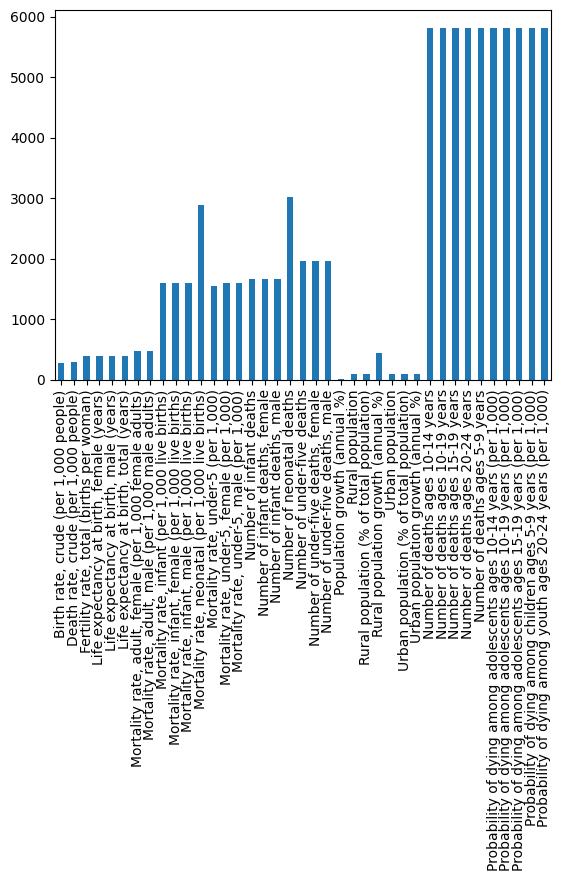

In [ ]:
#Visualizing null instances
null_column_sum=df.isnull().sum()
null_columns=null_column_sum[null_column_sum>0]
null_columns.plot(kind='bar')



Since there are few columns which have a lot of null instances, we cannot use the directly in our model

We have to make a decision where we will remove either those features which have a lot of null instances , thus probably losing some useful information vs removing instances with null features, thus having smaller data



In [ ]:
# Selecting only those columns which have null instances less that 2500
selected_columns=null_column_sum[null_column_sum<2500].index
selected_columns

Index(['Country Code', 'Prev 10th pop', 'Prev 15th pop',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old', 'Age dependency ratio, young',
       'Age population, age 00, female', 'Age population, age 00, male',
       'Age population, age 01, female', 'Age population, age 01, male',
       ...
       'Population, total', 'Rural population',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Sex ratio at birth (male births per female births)',
       'Urban population', 'Urban population (% of total population)',
       'Urban population growth (annual %)', 'Target pop', 'Target Year'],
      dtype='object', length=180)

In [ ]:
df_s=df[selected_columns]
df_s=df_s.drop('Population, total',axis=1)
df_s

,Country Code,Prev 10th pop,Prev 15th pop,Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 00, female","Age population, age 00, male","Age population, age 01, female","Age population, age 01, male",...,"Population, male (% of total population)",Rural population,Rural population (% of total population),Rural population growth (annual %),Sex ratio at birth (male births per female births),Urban population,Urban population (% of total population),Urban population growth (annual %),Target pop,Target Year
0,AFG,9565147.0,8622466.0,81.994815,4.985287,77.009528,202707.0,207791.5,174802.5,178098.0,...,51.549715,8617815.0,90.096,1.863678,1.049,947332.0,9.904,5.479444,12157386.0,1975
1,ALB,1864791.0,1608800.0,91.978319,10.025583,81.952736,33957.5,35876.0,32627.0,34974.0,...,51.407287,1282417.0,68.770,2.649382,1.060,582374.0,31.230,2.984828,2404831.0,1975
2,DZA,12381256.0,11394307.0,103.906841,8.125571,95.781269,265246.5,279426.0,247358.0,261572.5,...,51.043876,7720580.0,62.357,-0.733916,1.047,4660676.0,37.643,5.718149,15724692.0,1975
3,ASM,23391.0,20085.0,100.188276,4.758237,95.430039,447.5,468.0,432.0,450.0,...,51.117951,7407.0,31.666,1.880677,1.060,15984.0,68.334,3.806522,29573.0,1975
4,AND,13563.0,9443.0,52.170986,8.010771,44.160215,148.0,163.5,143.0,159.0,...,51.507779,4009.0,29.555,-0.646447,1.062,9554.0,70.445,9.882273,27640.0,1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9730,VIR,108404.0,108466.0,51.560993,19.672842,31.888151,784.5,766.0,759.5,755.5,...,47.834540,6050.0,5.581,-3.172287,1.039,102354.0,94.419,0.197549,106669.0,2019
9731,PSE,3689099.0,3236626.0,84.221817,5.089959,79.131859,62009.5,64777.0,60536.5,63003.5,...,49.898677,962006.0,26.077,1.831630,1.048,2727093.0,73.923,2.964647,4685306.0,2019
9732,YEM,24029589.0,20733406.0,88.519907,5.174924,83.344982,404589.5,425694.0,392807.5,412536.5,...,50.582692,16533799.0,68.806,2.126646,1.059,7495790.0,31.194,4.819355,31546691.0,2019
9733,ZMB,13318087.0,11188040.0,94.377864,3.454308,90.923556,266607.5,267742.0,255147.5,255578.5,...,48.981404,8142545.0,61.139,2.756588,1.012,5175542.0,38.861,4.823760,18380477.0,2019


In [ ]:
#Dropping all rows with null instances
df_s=df_s.dropna(axis=0,how='any')
df_s

,Country Code,Prev 10th pop,Prev 15th pop,Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 00, female","Age population, age 00, male","Age population, age 01, female","Age population, age 01, male",...,"Population, male (% of total population)",Rural population,Rural population (% of total population),Rural population growth (annual %),Sex ratio at birth (male births per female births),Urban population,Urban population (% of total population),Urban population growth (annual %),Target pop,Target Year
2,DZA,12381256.0,11394307.0,103.906841,8.125571,95.781269,265246.5,279426.0,247358.0,261572.5,...,51.043876,7720580.0,62.357,-0.733916,1.047,4660676.0,37.643,5.718149,15724692.0,1975
6,ATG,59644.0,55342.0,86.755174,8.416570,78.338604,954.5,974.5,941.0,954.5,...,47.656093,37808.0,63.390,2.607224,1.031,21836.0,36.610,0.032062,64035.0,1975
10,AUS,11388000.0,10276477.0,61.799216,13.887226,47.911990,108436.0,114380.5,111335.0,117552.0,...,50.368090,1928216.0,16.932,0.342820,1.058,9459784.0,83.068,2.292526,13893000.0,1975
11,AUT,7270889.0,7047539.0,57.540216,20.740851,36.799365,63112.0,65694.0,64053.5,66333.5,...,46.813844,2544011.0,34.989,0.509786,1.049,4726878.0,65.011,0.725129,7578903.0,1975
14,BHR,193012.0,160691.0,87.931337,3.833346,84.097990,3844.5,3963.0,3532.5,3650.0,...,55.744202,33777.0,17.500,2.752398,1.030,159235.0,82.500,3.520280,285116.0,1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9729,VNM,86482923.0,82311227.0,45.333857,9.399477,35.934380,684865.5,760747.0,678632.0,750921.5,...,49.230992,60743875.0,70.238,0.130795,1.118,25739048.0,29.762,3.182645,95776716.0,2019
9731,PSE,3689099.0,3236626.0,84.221817,5.089959,79.131859,62009.5,64777.0,60536.5,63003.5,...,49.898677,962006.0,26.077,1.831630,1.048,2727093.0,73.923,2.964647,4685306.0,2019
9732,YEM,24029589.0,20733406.0,88.519907,5.174924,83.344982,404589.5,425694.0,392807.5,412536.5,...,50.582692,16533799.0,68.806,2.126646,1.059,7495790.0,31.194,4.819355,31546691.0,2019
9733,ZMB,13318087.0,11188040.0,94.377864,3.454308,90.923556,266607.5,267742.0,255147.5,255578.5,...,48.981404,8142545.0,61.139,2.756588,1.012,5175542.0,38.861,4.823760,18380477.0,2019


In [ ]:
#Country Info Columns
con_info.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object')

In [ ]:
# Injecting country data into df
df_final=pd.merge(con_info[['Country Code','Region','Income Group']],df_s,on='Country Code')
df_final

,Country Code,Region,Income Group,Prev 10th pop,Prev 15th pop,Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 00, female","Age population, age 00, male",...,"Population, male (% of total population)",Rural population,Rural population (% of total population),Rural population growth (annual %),Sex ratio at birth (male births per female births),Urban population,Urban population (% of total population),Urban population growth (annual %),Target pop,Target Year
0,AFG,South Asia,Low income,10010030.0,8969047.0,83.908073,4.976931,78.931143,213945.0,219506.0,...,51.429526,8951970.0,89.430,1.916512,1.049,1058060.0,10.570,5.532866,12687301.0,1977
1,AFG,South Asia,Low income,10247780.0,9157465.0,84.844150,4.976000,79.868150,219913.0,225713.0,...,51.373995,9128927.0,89.082,1.957454,1.049,1118853.0,10.918,5.586701,12938862.0,1978
2,AFG,South Asia,Low income,10494489.0,9355514.0,85.760824,4.974508,80.786315,225996.5,232081.5,...,51.322013,9311235.0,88.725,1.977357,1.049,1183254.0,11.275,5.596422,12986369.0,1979
3,AFG,South Asia,Low income,10752971.0,9565147.0,86.644802,4.970392,81.674410,232038.0,238446.5,...,51.273309,9501003.0,88.357,2.017564,1.049,1251968.0,11.643,5.644844,12486631.0,1980
4,AFG,South Asia,Low income,11015857.0,9783147.0,87.493147,4.967781,82.525366,238197.5,244915.0,...,51.227154,9691641.0,87.979,1.986639,1.049,1324216.0,12.021,5.610387,11155195.0,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7530,ZWE,Sub-Saharan Africa,Lower middle income,12224753.0,11834676.0,82.047627,5.290433,76.757193,204378.0,207262.0,...,47.231433,8054890.0,65.890,0.803504,1.022,4169863.0,34.110,-0.014148,14154937.0,2015
7531,ZWE,Sub-Saharan Africa,Lower middle income,12330490.0,11910978.0,82.579189,5.289092,77.290097,202766.5,205644.5,...,47.190963,8147248.0,66.074,1.140084,1.022,4183242.0,33.926,0.320336,14452704.0,2016
7532,ZWE,Sub-Saharan Africa,Lower middle income,12450568.0,11984644.0,83.031612,5.293415,77.738197,204143.5,207037.5,...,47.166434,8249373.0,66.257,1.245700,1.022,4201195.0,33.743,0.428246,14751101.0,2017
7533,ZWE,Sub-Saharan Africa,Lower middle income,12550347.0,12075828.0,83.760473,5.333812,78.426661,209359.0,212289.5,...,47.106068,8338451.0,66.440,1.074027,1.022,4211896.0,33.560,0.254389,15052184.0,2018


In [ ]:
#Checking for occurenec of null
df_final.isnull().sum()

,0
Country Code,0
Region,0
Income Group,45
Prev 10th pop,0
Prev 15th pop,0
...,...
Urban population,0
Urban population (% of total population),0
Urban population growth (annual %),0
Target pop,0


In [ ]:
df_final[df_final['Income Group'].isnull()]

,Country Code,Region,Income Group,Prev 10th pop,Prev 15th pop,Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 00, female","Age population, age 00, male",...,"Population, male (% of total population)",Rural population,Rural population (% of total population),Rural population growth (annual %),Sex ratio at birth (male births per female births),Urban population,Urban population (% of total population),Urban population growth (annual %),Target pop,Target Year
7152,VEN,Latin America & Caribbean,NaN,9688138.0,8156937.0,97.658773,4.770286,92.888486,185595.5,191408.5,...,50.372930,3194954.0,32.978,0.299168,1.039,6493184.0,67.022,4.847678,13176387.0,1975
7153,VEN,Latin America & Caribbean,NaN,10010685.0,8453106.0,97.269726,4.823575,92.446151,188703.5,194481.0,...,50.350700,3201217.0,31.978,0.195836,1.038,6809468.0,68.022,4.756099,13566112.0,1976
7154,VEN,Latin America & Caribbean,NaN,10338848.0,8754082.0,96.617685,4.876186,91.741498,191764.5,197467.0,...,50.329834,3204526.0,30.995,0.103314,1.037,7134322.0,69.005,4.660323,13965250.0,1977
7155,VEN,Latin America & Caribbean,NaN,10672654.0,9059953.0,95.743536,4.929530,90.814006,194696.0,200361.5,...,50.310588,3204678.0,30.027,0.004743,1.036,7467976.0,69.973,4.570679,14372959.0,1978
7156,VEN,Latin America & Caribbean,NaN,11011335.0,9371333.0,94.688030,4.980881,89.707149,197365.5,203118.0,...,50.292721,3202096.0,29.080,-0.080602,1.037,7809239.0,70.920,4.468351,14788523.0,1979
7157,VEN,Latin America & Caribbean,NaN,11355475.0,9688138.0,93.477434,5.036541,88.440893,199711.5,205786.5,...,50.276602,3196339.0,28.148,-0.179950,1.038,8159136.0,71.852,4.383076,15210443.0,1980
7158,VEN,Latin America & Caribbean,NaN,11705674.0,10010685.0,92.128376,5.099275,87.029101,201988.5,208459.0,...,50.261728,3188157.0,27.236,-0.256309,1.039,8517517.0,72.764,4.298659,15638426.0,1981
7159,VEN,Latin America & Caribbean,NaN,12061621.0,10338848.0,90.650302,5.160918,85.489384,204733.5,211517.5,...,50.247798,3187283.0,26.425,-0.027418,1.040,8874338.0,73.575,4.103887,16071654.0,1982
7160,VEN,Latin America & Caribbean,NaN,12424804.0,10672654.0,89.094012,5.219564,83.874448,208376.5,215392.0,...,50.234225,3190068.0,25.675,0.087340,1.040,9234736.0,74.325,3.980829,16509596.0,1983
7161,VEN,Latin America & Caribbean,NaN,12796220.0,11011335.0,87.569196,5.278525,82.290671,212448.5,219651.5,...,50.221605,3190993.0,24.937,0.028992,1.041,9605227.0,75.063,3.933540,16953234.0,1984


In [ ]:
#Setting the null value
df_final.loc[:,'Income Group'][df_final['Income Group'].isnull()==True]='Upper middle income'

<ipython-input-116-f259d956c0e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[:,'Income Group'][df_final['Income Group'].isnull()==True]='Upper middle income'


In [ ]:
df_final['Income Group'].value_counts()

,count
Income Group,
High income,2362
Upper middle income,2076
Lower middle income,2074
Low income,1023


In [ ]:
df_final['Region'].value_counts()

,count
Region,
Sub-Saharan Africa,1904
Europe & Central Asia,1776
Latin America & Caribbean,1500
East Asia & Pacific,1108
Middle East & North Africa,818
South Asia,339
North America,90


One-hot encoding the Income and Region variables


In [ ]:
df_dum=pd.get_dummies(df_final,columns=['Region','Income Group'],dtype='int')
df_dum

,Country Code,Prev 10th pop,Prev 15th pop,Age dependency ratio (% of working-age population),"Age dependency ratio, old","Age dependency ratio, young","Age population, age 00, female","Age population, age 00, male","Age population, age 01, female","Age population, age 01, male",...,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,Income Group_High income,Income Group_Low income,Income Group_Lower middle income,Income Group_Upper middle income
0,AFG,10010030.0,8969047.0,83.908073,4.976931,78.931143,213945.0,219506.0,185132.5,188912.0,...,0,0,0,0,1,0,0,1,0,0
1,AFG,10247780.0,9157465.0,84.844150,4.976000,79.868150,219913.0,225713.0,190762.0,194759.5,...,0,0,0,0,1,0,0,1,0,0
2,AFG,10494489.0,9355514.0,85.760824,4.974508,80.786315,225996.5,232081.5,196518.5,200767.0,...,0,0,0,0,1,0,0,1,0,0
3,AFG,10752971.0,9565147.0,86.644802,4.970392,81.674410,232038.0,238446.5,202464.0,206996.5,...,0,0,0,0,1,0,0,1,0,0
4,AFG,11015857.0,9783147.0,87.493147,4.967781,82.525366,238197.5,244915.0,208253.0,213080.5,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7530,ZWE,12224753.0,11834676.0,82.047627,5.290433,76.757193,204378.0,207262.0,199251.0,200243.0,...,0,0,0,0,0,1,0,0,1,0
7531,ZWE,12330490.0,11910978.0,82.579189,5.289092,77.290097,202766.5,205644.5,198302.0,199646.5,...,0,0,0,0,0,1,0,0,1,0
7532,ZWE,12450568.0,11984644.0,83.031612,5.293415,77.738197,204143.5,207037.5,196735.5,198175.0,...,0,0,0,0,0,1,0,0,1,0
7533,ZWE,12550347.0,12075828.0,83.760473,5.333812,78.426661,209359.0,212289.5,197643.0,198697.5,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
df_dum.describe().columns

Index(['Prev 10th pop', 'Prev 15th pop',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old', 'Age dependency ratio, young',
       'Age population, age 00, female', 'Age population, age 00, male',
       'Age population, age 01, female', 'Age population, age 01, male',
       'Age population, age 02, female',
       ...
       'Region_Europe & Central Asia', 'Region_Latin America & Caribbean',
       'Region_Middle East & North Africa', 'Region_North America',
       'Region_South Asia', 'Region_Sub-Saharan Africa',
       'Income Group_High income', 'Income Group_Low income',
       'Income Group_Lower middle income', 'Income Group_Upper middle income'],
      dtype='object', length=189)

# **Model**

Now that we have cleaned up data, we can program the model

For the model, the metrics we will use  is the decadal population growth as it is easy to visualize and interpret

In [ ]:
#Defining decadal populatuion growth as target
df_dum['Decadal_growth']=(df_dum['Target pop']-df_dum['Prev 10th pop'])/df_dum['Prev 10th pop']*100
df_dum['Decadal_growth']

,Decadal_growth
0,26.745884
1,26.260146
2,23.744653
3,16.122614
4,1.264886
...,...
7530,15.789145
7531,17.211108
7532,18.477334
7533,19.934405


**Baseline Mode**:
we will define baseline model as one where the population growth is constant across 10 years

In [ ]:
#Creating a temporary dataframe
temp=pd.DataFrame(columns=['Decadal_growth_actual','Prev 10 pop','Annual_growth'])

In [ ]:
temp[['Decadal_growth_actual','Prev 10 pop','Annual_growth']]=df_dum[['Decadal_growth','Prev 10th pop','Population growth (annual %)']]

In [ ]:
temp

,Decadal_growth_actual,Prev 10 pop,Annual_growth
0,26.745884,10010030.0,2.292638
1,26.260146,10247780.0,2.347351
2,23.744653,10494489.0,2.378917
3,16.122614,10752971.0,2.433183
4,1.264886,11015857.0,2.415369
...,...,...,...
7530,15.789145,12224753.0,0.523851
7531,17.211108,12330490.0,0.861223
7532,18.477334,12450568.0,0.969119
7533,19.934405,12550347.0,0.798207


In [ ]:
# Applying a fomula assuming population growth is constant caross the 10 years
temp['Const_growth']=temp.apply(lambda x:(np.power((1+x['Annual_growth']/100),10)*x['Prev 10 pop']-x['Prev 10 pop'])/x['Prev 10 pop']*100,axis=1)
temp

,Decadal_growth_actual,Prev 10 pop,Annual_growth,Const_growth
0,26.745884,10010030.0,2.292638,25.442235
1,26.260146,10247780.0,2.347351,26.114798
2,23.744653,10494489.0,2.378917,26.504301
3,16.122614,10752971.0,2.433183,27.176441
4,1.264886,11015857.0,2.415369,26.955450
...,...,...,...,...
7530,15.789145,12224753.0,0.523851,5.363736
7531,17.211108,12330490.0,0.861223,8.953775
7532,18.477334,12450568.0,0.969119,10.124933
7533,19.934405,12550347.0,0.798207,8.274970


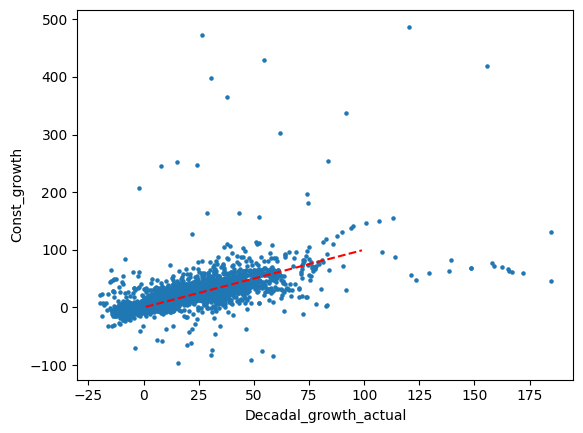

In [ ]:
#Plotting the graph
plt.scatter(temp['Decadal_growth_actual'],temp['Const_growth'],s=5)
plt.xlabel('Decadal_growth_actual')
plt.ylabel('Const_growth')
plt.plot(np.arange(1,100),np.arange(1,100),'r--')


In [ ]:
temp['Error in estimation']=np.abs(temp['Decadal_growth_actual']-temp['Const_growth'])
print(f'Mean absolute error while projecting:{np.mean(temp["Error in estimation"])}')

Mean absolute error while projecting:6.350829937173186


we acn see that if we were simply projecting future population based on current growth, there will be around 6% variation in our estimate.

Lets see if we can beat the baseline with models

In [ ]:
#Visualising the correlation
df_dum.corr(numeric_only=True)['Target pop'].sort_values(ascending=False).head(10)

,Target pop
Target pop,1.000000
"Population, male",0.998472
Prev 10th pop,0.998199
"Population, female",0.997624
Prev 15th pop,0.996038
"Population ages 15-19, male",0.994201
"Population ages 15-19, female",0.993606
"Population ages 20-24, male",0.993443
"Population ages 20-24, female",0.992656
"Age population, age 18, male",0.991969


Checking the correlation with target variable, to check whether any column is 100% correlated, to prevent data leaking


**Partitioning into Train,Test & Valid df**

In [ ]:
feature_data=df_dum.drop(['Country Code','Target pop','Decadal_growth'],axis=1)
target_data=df_dum['Decadal_growth']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_all, X_test, y_train_all, y_test=train_test_split(feature_data,target_data,test_size=0.1,random_state=42)

In [ ]:
X_train, X_val, y_train, y_val=train_test_split(X_train_all,y_train_all,test_size=0.1,random_state=42)

Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit_transform(X_train_all)

array([[-0.24677986, -0.24593848,  1.0585644 , ..., -0.39594499,
         1.62656046, -0.61342798],
       [-0.19385618, -0.19629406,  0.73325068, ..., -0.39594499,
        -0.61479424,  1.63018321],
       [-0.2485017 , -0.24749049,  0.93994978, ..., -0.39594499,
         1.62656046, -0.61342798],
       ...,
       [ 0.58841393,  0.57124619, -0.43872602, ..., -0.39594499,
         1.62656046, -0.61342798],
       [ 0.90445805,  0.85528285, -0.0978055 , ..., -0.39594499,
        -0.61479424,  1.63018321],
       [ 0.44683106,  0.43942684, -0.35668182, ..., -0.39594499,
         1.62656046, -0.61342798]])

In [ ]:
X_train_s=scaler.transform(X_train)
X_test_s=scaler.transform(X_test)
X_val_s=scaler.transform(X_val)

**Training a Simple Linear Regression**

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model=LinearRegression()

In [ ]:
linear_model.fit(X_train_s,y_train)

LinearRegression()

In [ ]:
y_pred=linear_model.predict(X_test_s)

In [ ]:
print(f'Mean absolute error:{metrics.mean_absolute_error(y_test,y_pred)}')

Mean absolute error:5.193226458232321


We can see that there is 1% point improvement over Base model

**Training a deep learning model**

Defining a simple Sequential model

In [ ]:
#Dimension of feature
dim=X_train.shape[1]

In [ ]:
from tensorflow import keras

In [ ]:
from keras.layers import Dense,BatchNormalization,Dropout,Input,Activation

In [ ]:
input=Input(shape=(dim,))
x=Dense(512,activation=None, use_bias=False)(input)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=Dense(512,activation=None, use_bias=False)(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)

output=Dense(1,activation=None)(x)

model=keras.models.Model(inputs=input,outputs=output)

model.compile(optimizer='nadam',loss='mse',metrics=['mae'])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 188)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          96,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 363,009 (1.38 MB)

 Trainable params: 360,961 (1.38 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [ ]:
history=model.fit(X_train_s,y_train,batch_size=32,epochs=100,validation_data=[X_val_s,y_val])

Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 284.5144 - mae: 12.7886 - val_loss: 125.0206 - val_mae: 7.1157
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 82.1611 - mae: 5.7224 - val_loss: 98.3314 - val_mae: 5.3799
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 72.4094 - mae: 5.3325 - val_loss: 94.7963 - val_mae: 5.4349
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 72.0357 - mae: 5.2923 - val_loss: 93.4916 - val_mae: 6.0225
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 75.5586 - mae: 5.5085 - val_loss: 81.9387 - val_mae: 5.2987
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 55.2617 - mae: 4.9075 - val_loss: 67.5080 - val_mae: 4.8127
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 56.6464 - mae: 4.9304 - val_loss: 63.1739 - val_mae: 4.8296
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 57.0371 - mae: 5.0631 - val_loss: 77.5452 - val_mae: 4.9665
Epoch 9/100
191/191 ━

In [ ]:
model.evaluate(X_test_s,y_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4598 - mae: 1.9095


[8.301196098327637, 1.867409586906433]

We can see that there is almose 4% point improvement, which is significant

In [ ]:
y_pred=model.predict(X_test_s)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


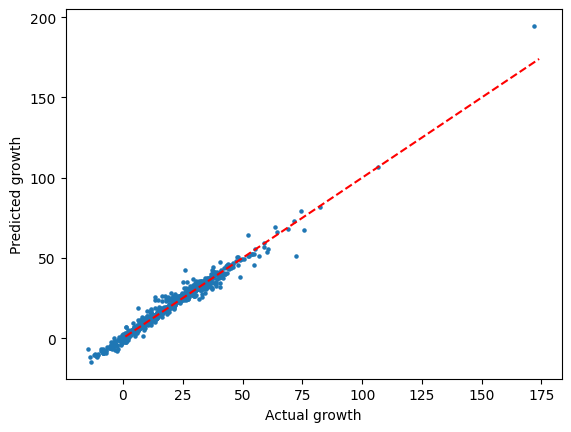

In [ ]:
#Plotting the graph
plt.scatter(y_test,y_pred,s=5)
plt.xlabel('Actual growth')
plt.ylabel('Predicted growth')
plt.plot(np.arange(1,175),np.arange(1,175),'r--')

Text(0, 0.5, 'Error in prediction')

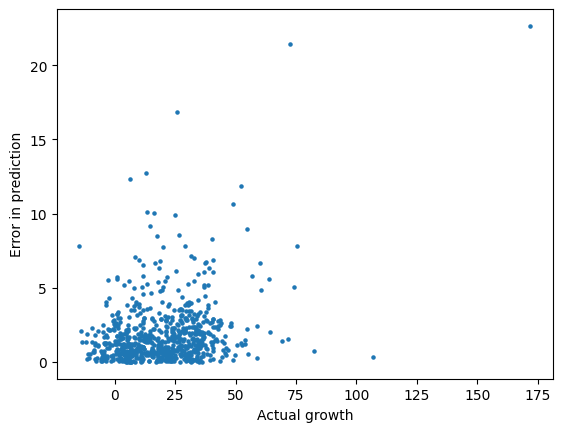

In [ ]:
plt.scatter(y_test,np.abs(y_pred[:,0]-y_test),s=5)
plt.xlabel('Actual growth')
plt.ylabel('Error in prediction')

Tuning our Deep Learning model

In [ ]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
import keras_tuner

In [ ]:
def pop_model(hp):

  units=hp.Int("units", min_value=512, max_value=1024, step=64)
  layers=hp.Int("layers", min_value=1, max_value=5, step=1)
  lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-1, step=10, sampling='log')
  activation=hp.Choice('activation',  ['relu'])


  input=Input(shape=(dim,))

  x=Dense(units,activation=None, use_bias=False)(input)
  x=BatchNormalization()(x)
  x=Activation(activation)(x)

  for i in range(layers):
    x=Dense(units,activation=None, use_bias=False)(x)
    x=BatchNormalization()(x)
    x=Activation(activation)(x)


  output=Dense(1,activation=None)(x)

  model=keras.models.Model(inputs=input,outputs=output)

  model.compile(optimizer=keras.optimizers.Nadam(learning_rate=lr),loss='mse',metrics=['mae'])

  return model





In [ ]:
hp=keras_tuner.HyperParameters()

In [ ]:
tuner = keras_tuner.BayesianOptimization(
    hypermodel=pop_model,
    objective="val_mae",
    max_trials=10,
    executions_per_trial=1,
    overwrite=True
)

In [ ]:
tuner.search(X_train_s,y_train,batch_size=64,epochs=100,validation_data=[X_val_s,y_val])

Trial 10 Complete [00h 07m 45s]
val_mae: 1.9870294332504272

Best val_mae So Far: 1.4216829538345337
Total elapsed time: 01h 28m 45s


In [ ]:
#Getting the best hyperparameter values
hyperparameter=tuner.get_best_hyperparameters(1)
hyperparameter[0].values

{'units': 896, 'layers': 3, 'learning_rate': 0.001, 'activation': 'relu'}

In [ ]:
list_model=tuner.get_best_models(1)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 2 variables whereas the saved optimizer has 31 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
model_best=list_model[0]

Now training the best model to overfit

In [ ]:
#Using early stopping callback
callbacks=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [ ]:
history=model_best.fit(X_train_s,y_train,batch_size=64,epochs=300,validation_data=[X_val_s,y_val],callbacks=[callbacks])

Epoch 1/300
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 6.8670 - mae: 1.7934 - val_loss: 7.0549 - val_mae: 1.5898
Epoch 2/300
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 6.6720 - mae: 1.7311 - val_loss: 8.9113 - val_mae: 1.8233
Epoch 3/300
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 6.6987 - mae: 1.7393 - val_loss: 7.6150 - val_mae: 1.6780
Epoch 4/300
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - loss: 6.1708 - mae: 1.6769 - val_loss: 10.1250 - val_mae: 1.7959
Epoch 5/300
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 5.5622 - mae: 1.6544 - val_loss: 6.0908 - val_mae: 1.5315
Epoch 6/300
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 6.0087 - mae: 1.6867 - val_loss: 7.7418 - val_mae: 1.7192
Epoch 7/300
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 6.3087 - mae: 1.7275 - val_loss: 8.5636 - val_mae: 1.8686
Epoch 8/300
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 6.0374 - mae: 1.7579 - val_loss: 12.0255 - val_mae: 1.6320
Epoch 9/300
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step

We can see that the model is already overfitted, so we will regularize it using Dropout

In [ ]:
model_best.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 188)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 896)                 │         168,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 896)                 │           3,584 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 896)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 896)                 │         802,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 896)                 │           3,584 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 896)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 896)                 │         802,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 896)                 │           3,584 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 896)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 896)                 │         802,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 896)                 │           3,584 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 896)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             897 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,762,054 (29.61 MB)

 Trainable params: 2,584,961 (9.86 MB)

 Non-trainable params: 7,168 (28.00 KB)

 Optimizer params: 5,169,925 (19.72 MB)

In [ ]:
#Dropout HP , to be used later

#def pop_model_drop(hp):


  dropout=hp.Float('dropout',min_value=0.1, max_value=0.5, step=0.05)


  input=Input(shape=(dim,))

  x=Dense(704,activation=None, use_bias=False)(input)
  x=BatchNormalization()(x)
  x=Activation('relu')(x)

  for i in range(5):
    x=Dropout(dropout)(x)
    x=Dense(704,activation=None, use_bias=False)(x)

    x=BatchNormalization()(x)
    x=Activation('relu')(x)



  output=Dense(1,activation=None)(x)

  model=keras.models.Model(inputs=input,outputs=output)

  model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.01),loss='mse',metrics=['mse'])

  return model


In [ ]:
#hp=keras_tuner.HyperParameters()

In [ ]:
#tuner = keras_tuner.BayesianOptimization(
    hypermodel=pop_model_drop,
    objective="val_mse",
    max_trials=5,
    executions_per_trial=1,
    overwrite=True
)

In [ ]:
#tuner.search(X_train_s,y_train,batch_size=64,epochs=100,validation_data=[X_val_s,y_val])

Trial 5 Complete [00h 13m 50s]
val_mse: 21.42524528503418

Best val_mse So Far: 21.42524528503418
Total elapsed time: 01h 09m 17s


In [ ]:
#hyperparameter=tuner.get_best_hyperparameters(1)
hyperparameter[0].values

{'dropout': 0.1}

In [ ]:
def model_dropout(dropout=0.2):

  input=Input(shape=(dim,))

  x=Dense(896,activation=None, use_bias=False)(input)
  x=BatchNormalization()(x)
  x=Activation('relu')(x)

  for i in range(3):
    x=Dropout(dropout)(x)
    x=Dense(896,activation=None, use_bias=False)(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)


  output=Dense(1,activation=None)(x)

  model=keras.models.Model(inputs=input,outputs=output)

  model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.001),loss='mse',metrics=['mae'])

  return model

In [ ]:
model_final=model_dropout(dropout=0.2)

In [ ]:
callbacks=keras.callbacks.EarlyStopping(monitor='val_loss',patience=50,restore_best_weights=True,mode='min')

In [ ]:
history=model_final.fit(X_train_s,y_train,batch_size=64,epochs=500,validation_data=[X_val_s,y_val],callbacks=[callbacks])

Epoch 1/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - loss: 15.6613 - mae: 2.8562 - val_loss: 15.5136 - val_mae: 2.4989
Epoch 2/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - loss: 19.4336 - mae: 2.9833 - val_loss: 23.0384 - val_mae: 3.0023
Epoch 3/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 20.5279 - mae: 3.0981 - val_loss: 14.6950 - val_mae: 2.5758
Epoch 4/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 17.3277 - mae: 2.9547 - val_loss: 23.7856 - val_mae: 2.7861
Epoch 5/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - loss: 21.3972 - mae: 3.1677 - val_loss: 14.8348 - val_mae: 2.5010
Epoch 6/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 16.5817 - mae: 2.8950 - val_loss: 15.5927 - val_mae: 2.6882
Epoch 7/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 17.3665 - mae: 2.9133 - val_loss: 17.4309 - val_mae: 2.4202
Epoch 8/500
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 14.8828 - mae: 2.7879 - val_loss: 13.4319 - val_mae: 2.4595
Epoch 9/500
96/96 ━━━━━━━━━━━━━━━━━━

In [ ]:
model_final.evaluate(X_test_s,y_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.6190 - mae: 0.9748


[2.9136621952056885, 0.986473560333252]

As we can see, the Error is reduced to around 1 percentage point

In [ ]:
y_pred=model_final.predict(X_test_s)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


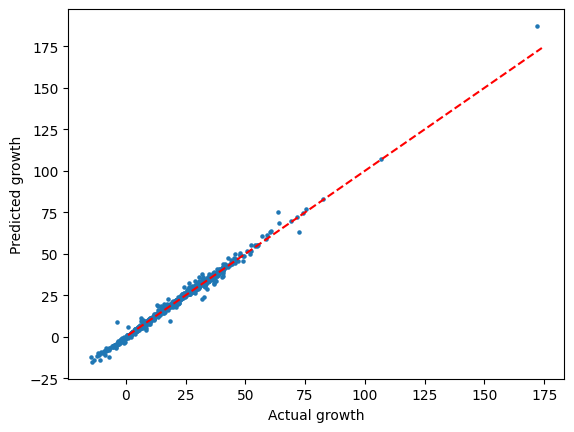

In [ ]:
#Plotting the graph
plt.scatter(y_test,y_pred,s=5)
plt.xlabel('Actual growth')
plt.ylabel('Predicted growth')
plt.plot(np.arange(1,175),np.arange(1,175),'r--')

Text(0, 0.5, 'Error in prediction')

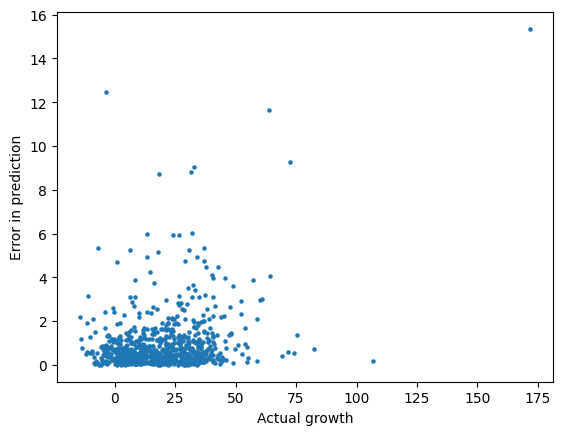

In [ ]:
plt.scatter(y_test,np.abs(y_pred[:,0]-y_test),s=5)
plt.xlabel('Actual growth')
plt.ylabel('Error in prediction')

In [ ]:
# Saving the model
model_final.save('/gdrive/My Drive/Colab Notebooks/World population estimate/population_estimate_final.keras')

**Testing on 20-22 data**

In [ ]:
df_new=generate_df(list(range(2020,2023,1)))

In [ ]:
df_new=df_new[selected_columns]
df_new=df_new.drop('Population, total',axis=1)
df_new=df_new.dropna(axis=0,how='any')


In [ ]:
df_final_new=pd.merge(con_info[['Country Code','Region','Income Group']],df_new,on='Country Code')
df_final_new.isnull().sum()
df_final_new=df_final_new.dropna(axis=0,how='any')

In [ ]:
df_dum_new=pd.get_dummies(df_final_new,columns=['Region','Income Group'],dtype='int')

In [ ]:
df_dum_new.shape

(561, 190)

In [ ]:
#Defining decadal populatuion growth as target
df_dum_new['Decadal_growth']=(df_dum_new['Target pop']-df_dum_new['Prev 10th pop'])/df_dum_new['Prev 10th pop']*100


In [ ]:
X_test_new=df_dum_new.drop(['Country Code','Target pop','Decadal_growth'],axis=1)
y_test_new=df_dum_new['Decadal_growth']

In [ ]:
X_test_new_s=scaler.transform(X_test_new)

In [ ]:
y_test_new=np.array(y_test_new).reshape((-1,1))

In [ ]:
y_test_new.shape

(561, 1)

In [ ]:
model_final.evaluate(X_test_new_s,y_test_new)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27.7936 - mae: 2.3154 


[24.9320068359375, 2.301464557647705]

On completely new data from 20-22, we  get worse 'Mean Average error' but we still improved upon our baseline model by 4 pct points.

*Note: the prediction may also be affected by COVID-19 pandemic